## Imports
Execute the cell below to import all packages needed.

In [1]:

# System functionality
import sys
sys.path.append('..')

import glob
import os
import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import seaborn as sns
import graphviz
import math as math
import json
import cv2
import matplotlib.image as mpimg
from sympy import *
from skimage import data, io, filters
from numpy import linspace
from numpy.core.umath import pi
from matplotlib.ticker import FuncFormatter
from matplotlib.font_manager import FontProperties
from emoji_extractor.extract import Extractor
from emojipedia import Emojipedia
from skimage import io

## Load csv into pandas dataframe

In [2]:
path__tweets_csv = '/home/stelios/Desktop/Honours Project/Samples/tweet_data/tweets_lon_all.csv'
path_users_csv = '/home/stelios/Desktop/Honours Project/Samples/user_data/lon.csv'

lon_tweets_df = pd.read_csv(path__tweets_csv,index_col=None, header=0, low_memory = False).applymap(str)
lon_users_df = pd.read_csv(path_users_csv,index_col=None, header=0, low_memory = False).applymap(str)

lon_join_df = lon_tweets_df.join(lon_users_df.set_index('user_id'), on='user_id')

## Bar Chart Formatters

In [3]:
# Millions Formatter Function
def millions(x,pos):
    return '%1.1fK' % (x*1e-3)

# Power of 10 Formatter Function (y log scale bug, so i have created this formatter)
def pow10(x,pos):
    return "{:.0f}\n10 ".format(x)

# Power of 10 (1 d.p) Formatter Function (y log scale bug, so i have created this formatter)
def pow10_1dp(x,pos):
    return "{:.1f}\n10     ".format(x)

# Percenatge Formatter Function
def percentage(x,pos):
    return "{:.1f}%".format(x*100)

# Create a formatters
formatter_millions = FuncFormatter(millions)
formatter_pow10 = FuncFormatter(pow10)
formatter_pow10_1dp = FuncFormatter(pow10_1dp)
formatter_percentage = FuncFormatter(percentage)

# Use TwitterColorEmoji Font (only one supporting emojis) 
emojis_font = FontProperties(fname='./Fonts/TwitterColorEmoji-SVGinOT.ttf',size=55)

## Emojis on Bar Chart Function

In [5]:
def bar_chart_plot_emojis(ax,fig,x):
    # Set sizes of figure and images
    ax_width = ax.get_window_extent().width
    fig_width = fig.get_window_extent().width
    fig_height = fig.get_window_extent().height
    img_size = ax_width/(fig_width*len(x_linespace))
    img_axs = [None for i in range(len(x_linespace))]

    # Display emojis pngs on x-axis
    for i in range(len(x)):
        loc = ax.transData.transform((x_linespace[i], 0))      # Optimize y manually 
        img_axs[i] = fig.add_axes([loc[0]/fig_width-img_size/2, loc[1]/fig_height-img_size/2,
                                   img_size, img_size], anchor='C')

        # Platform 5 = Twitter
        img_axs[i].imshow(io.imread(Emojipedia.search(x[i]).platforms[5].image_url))
        img_axs[i].axis("off")

## Extract, Count & Sort Emojis for all

In [6]:
extract = Extractor()

count = extract.count_all_emoji(lon_join_df['text'])

# Display most common
#count.most_common()

# Create panda dataframe to store emojis with counts
emojis_count_df = pd.DataFrame(columns = ['Emoji','Count'])
for emoji in count:
    emojis_count_df = emojis_count_df.append({'Emoji' : emoji , 'Count' : count[emoji]} , ignore_index=True)

# Sort dataframe by count
emojis_count_df = emojis_count_df.sort_values(by=['Count'])
emojis_count_df.tail(20)

,Emoji,Count
52,💙,5224
33,😅,6049
25,😁,7146
0,😉,7402
34,🎉,7477
217,💕,7961
57,🙄,8248
53,👀,8372
28,🤔,8532
88,👍,9408


## Top 15 Emojis Graph

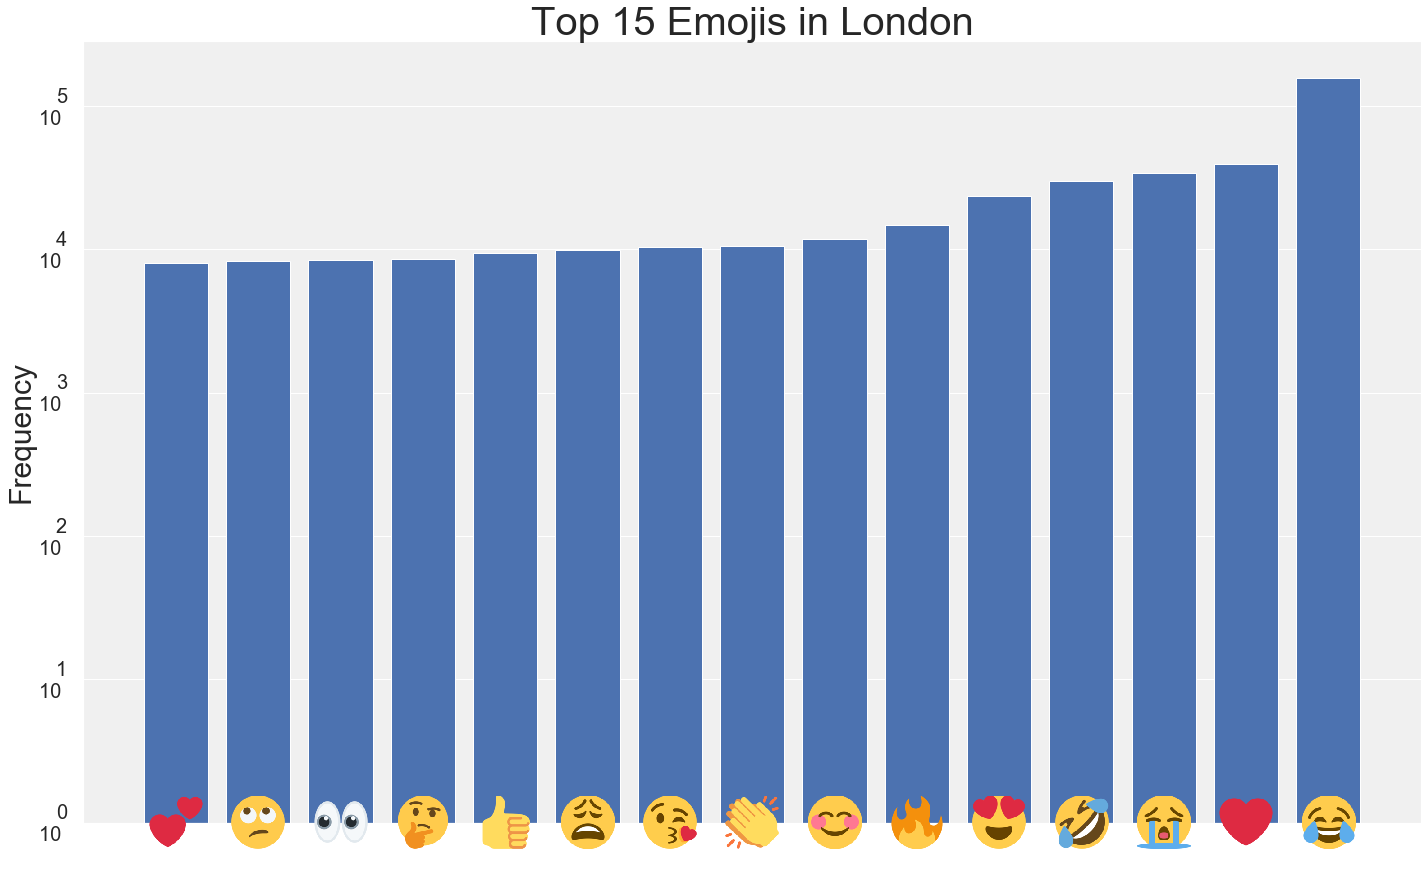

In [7]:
# Top 15 Values
x = emojis_count_df['Emoji'].tail(15).values
y = emojis_count_df['Count'].tail(15).values
y_log = np.log10(y.astype(int))

# Set linespacing
x_linespace = linspace(0, 4*pi, num=15)

# Plot Bar Chart
sns.set(color_codes=True) # Seaborn 
fig, ax = plt.subplots(figsize=(20,12))
ax.yaxis.set_major_formatter(formatter_pow10)
ax.tick_params(axis='both', which='major', pad=10)
ax.set_facecolor('#0F0F0F0F')
plt.grid(linestyle='-', linewidth=1,axis='y')
plt.bar(x_linespace, y_log, width=0.7, bottom=None, align='center')
ax.get_xaxis().set_visible(False)
plt.yticks(fontsize =20)
plt.ylabel('Frequency', fontsize =30)
plt.title('Top 15 Emojis in London', fontsize =40)
plt.tight_layout()

# Plot emojis on x-axis
bar_chart_plot_emojis(ax,fig,x)
plt.show()

## Extract, Count & Sort Emojis for females

In [8]:
# Count emojis (Gender Confidence =1)
count_females = extract.count_all_emoji(lon_join_df.loc[(lon_join_df['gender'] == 'female')& (lon_join_df['gender:confidence'].astype(float)==1)]['text'])

# Create panda dataframe to store emojis with counts
emojis_count_females_df = pd.DataFrame(columns = ['Emoji','Count'])
for emoji in count_females:
    emojis_count_females_df = emojis_count_females_df.append({'Emoji' : emoji , 'Count' : count_females[emoji]} , ignore_index=True)

# Sort dataframe by count
emojis_count_females_df = emojis_count_females_df.sort_values(by=['Count'])
emojis_count_females_df.tail(20)

,Emoji,Count
55,💙,1835
219,💛,1849
40,👏,1865
100,💜,1899
11,😁,1943
293,👏🏾,2126
160,💖,2428
241,✨,2462
84,🙄,2658
35,🎉,2991


## Extract, Count & Sort Emojis for males

In [9]:
# Count emojis (Gender Confidence =1)
count_males = extract.count_all_emoji(lon_join_df.loc[(lon_join_df['gender'] == 'male')& (lon_join_df['gender:confidence'].astype(float)==1)]['text'])

# Create panda dataframe to store emojis with counts
emojis_count_males_df = pd.DataFrame(columns = ['Emoji','Count'])
for emoji in count_males:
    emojis_count_males_df = emojis_count_males_df.append({'Emoji' : emoji , 'Count' : count_males[emoji]} , ignore_index=True)

# Sort dataframe by count
emojis_count_males_df = emojis_count_males_df.sort_values(by=['Count'])
emojis_count_males_df.tail(20)

,Emoji,Count
116,😀,1202
106,😆,1270
9,🎉,1381
391,🙌🏾,1444
28,😉,1558
114,😁,1614
247,😩,1689
37,🙄,1814
133,💯,1828
26,😊,1965


## Dinstict Emojis per Gender

In [10]:
gender_stats_df = emojis_count_females_df.rename(columns={'Count': 'Females_Count'}).join(emojis_count_males_df.rename(columns={'Count': 'Males_Count'}).set_index('Emoji'), on='Emoji')

# Calculate percentage usage for each emoji per gender
female_count_perc = gender_stats_df['Females_Count'] /gender_stats_df['Females_Count'].sum()
gender_stats_df['Females_Count_Perc']=female_count_perc
male_count_perc = gender_stats_df['Males_Count'] /gender_stats_df['Males_Count'].sum()
gender_stats_df['Males_Count_Perc']=male_count_perc
male_perc_dif = gender_stats_df['Males_Count_Perc'] - gender_stats_df['Females_Count_Perc']
gender_stats_df['Males_Perc_Dif']=male_perc_dif
female_perc_dif = gender_stats_df['Females_Count_Perc'] - gender_stats_df['Males_Count_Perc']
gender_stats_df['Females_Perc_Dif']=female_perc_dif

gender_stats_df.tail(20)

,Emoji,Females_Count,Males_Count,Females_Count_Perc,Males_Count_Perc,Males_Perc_Dif,Females_Perc_Dif
55,💙,1835,642,0.00744458,0.0037858,-0.00365878,0.00365878
219,💛,1849,182,0.00750138,0.00107323,-0.00642815,0.00642815
40,👏,1865,2369,0.00756629,0.0139697,0.00640343,-0.00640343
100,💜,1899,361,0.00770423,0.00212878,-0.00557545,0.00557545
11,😁,1943,1614,0.00788274,0.00951758,0.00163484,-0.00163484
293,👏🏾,2126,494,0.00862517,0.00291306,-0.0057121,0.0057121
160,💖,2428,352,0.00985038,0.0020757,-0.00777467,0.00777467
241,✨,2462,584,0.00998832,0.00344378,-0.00654453,0.00654453
84,🙄,2658,1814,0.0107835,0.010697,-8.65333e-05,8.65333e-05
35,🎉,2991,1381,0.0121345,0.0081436,-0.00399086,0.00399086


## Top 15 Emojis Graph by Gender

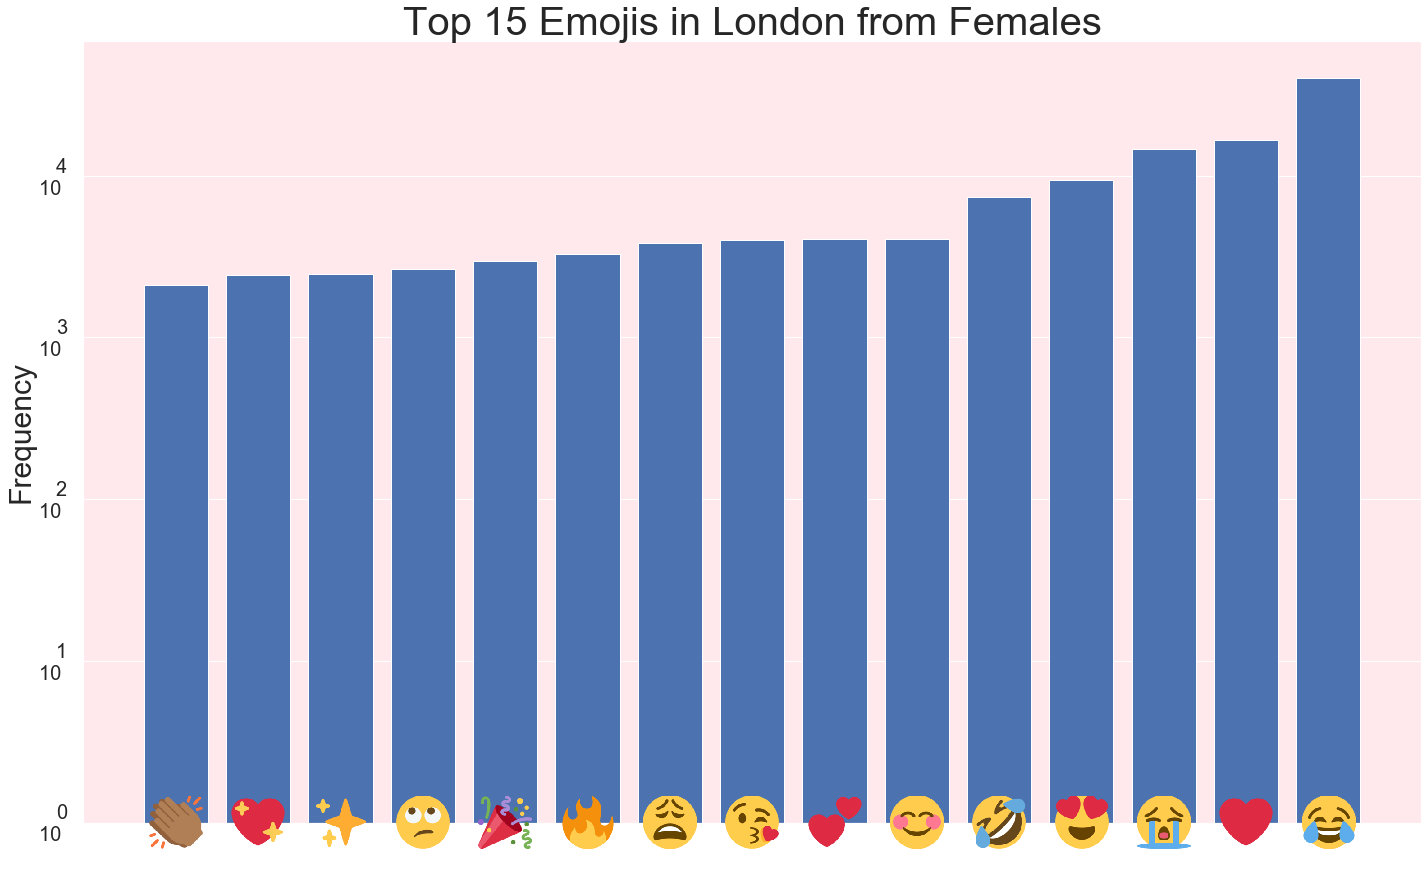

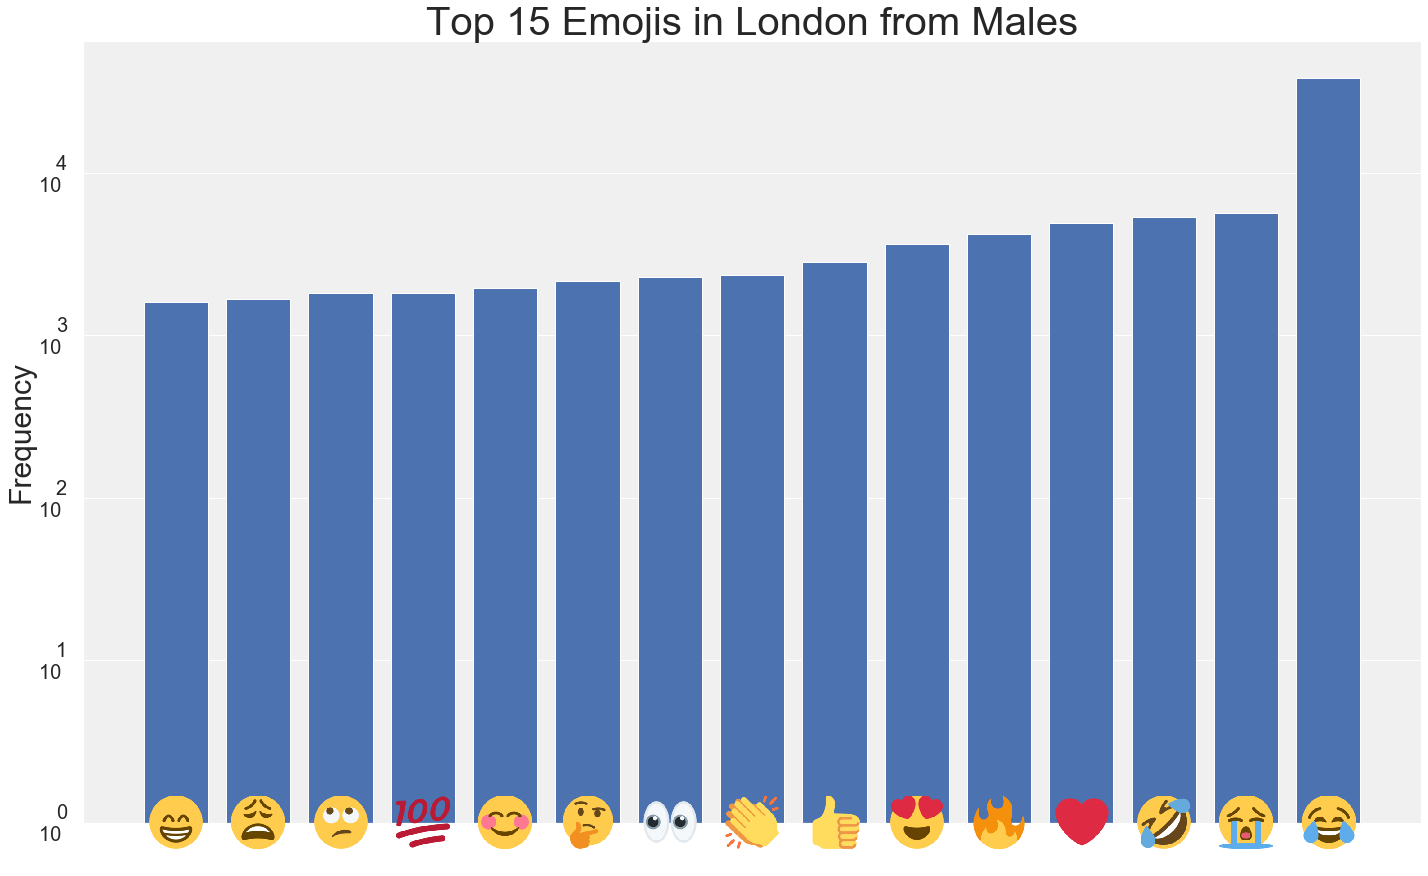

In [11]:
gender_list = ['Females','Males']
gender_values =[emojis_count_females_df,emojis_count_males_df]
gender_graph_colours=['ffe9ec','0F0F0F0F']

for ind,gen in enumerate(gender_list):
    
    # Top 15 Values
    x = gender_values[ind]['Emoji'].tail(15).values
    y = gender_values[ind]['Count'].tail(15).values
    y_log = np.log10(y.astype(int))

    # Set linespacing
    x_linespace = linspace(0, 4*pi, num=15)

    # Plot Bar Chart
    fig, ax = plt.subplots(figsize=(20,12))
    ax.yaxis.set_major_formatter(formatter_pow10)
    ax.tick_params(axis='both', which='major', pad=10)
    ax.set_facecolor('#{}'.format(gender_graph_colours[ind]))
    plt.grid(linestyle='-', linewidth=1,axis='y')
    plt.bar(x_linespace, y_log, width=0.7, bottom=None, align='center')
    ax.get_xaxis().set_visible(False)
    #plt.xticks(x, fontproperties=emojis_font)  Old method
    plt.yticks(fontsize =20)
    plt.ylabel('Frequency', fontsize =30)
    plt.title('Top 15 Emojis in London from {}'.format(gender_list[ind]), fontsize =40)
    plt.tight_layout()

    # Plot emojis on x-axis
    bar_chart_plot_emojis(ax,fig,x)
    plt.show()

## Top 15 Dinstinct Emojis by Gender

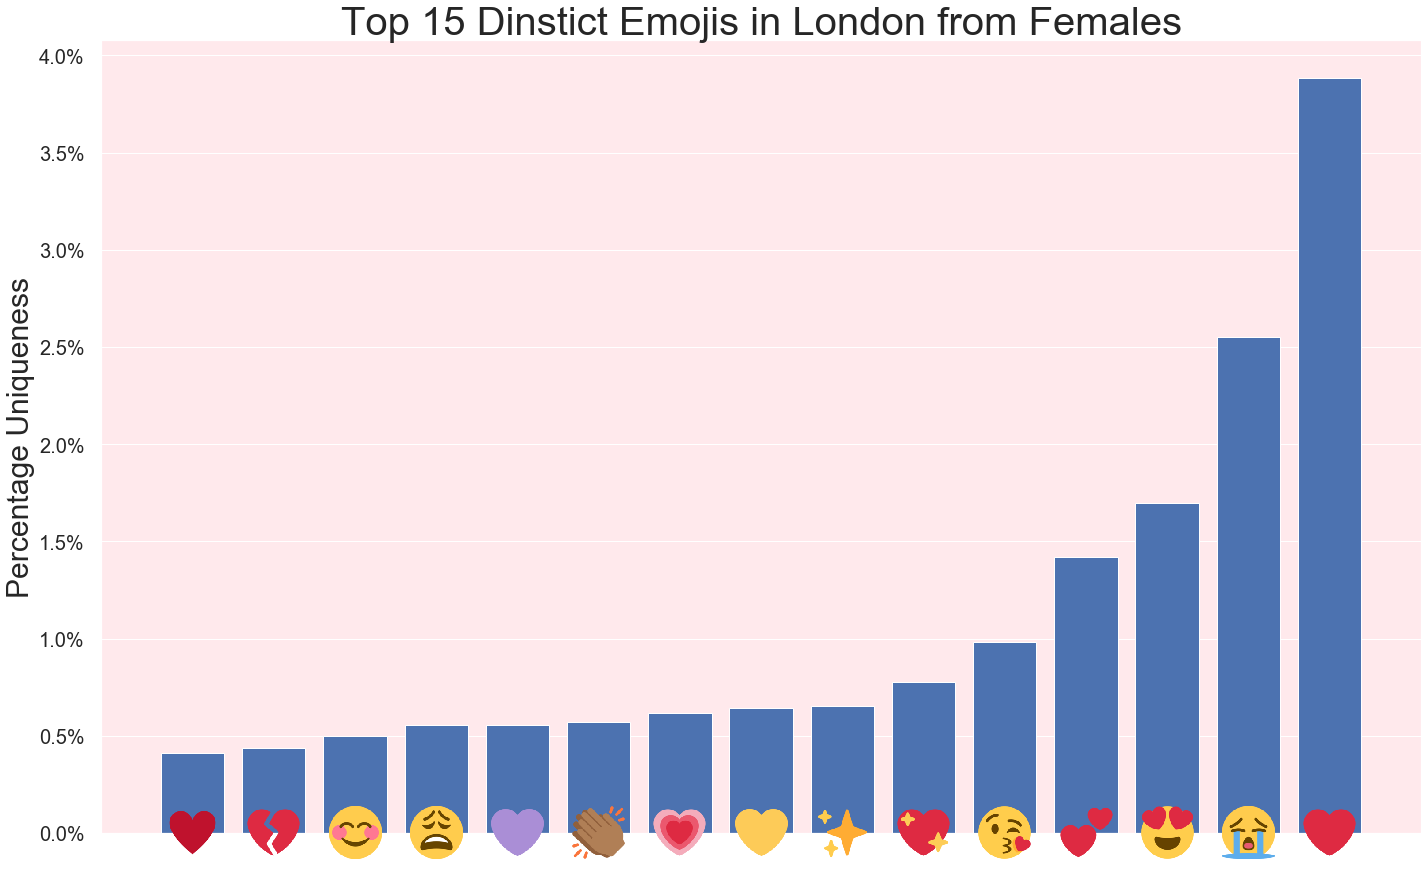

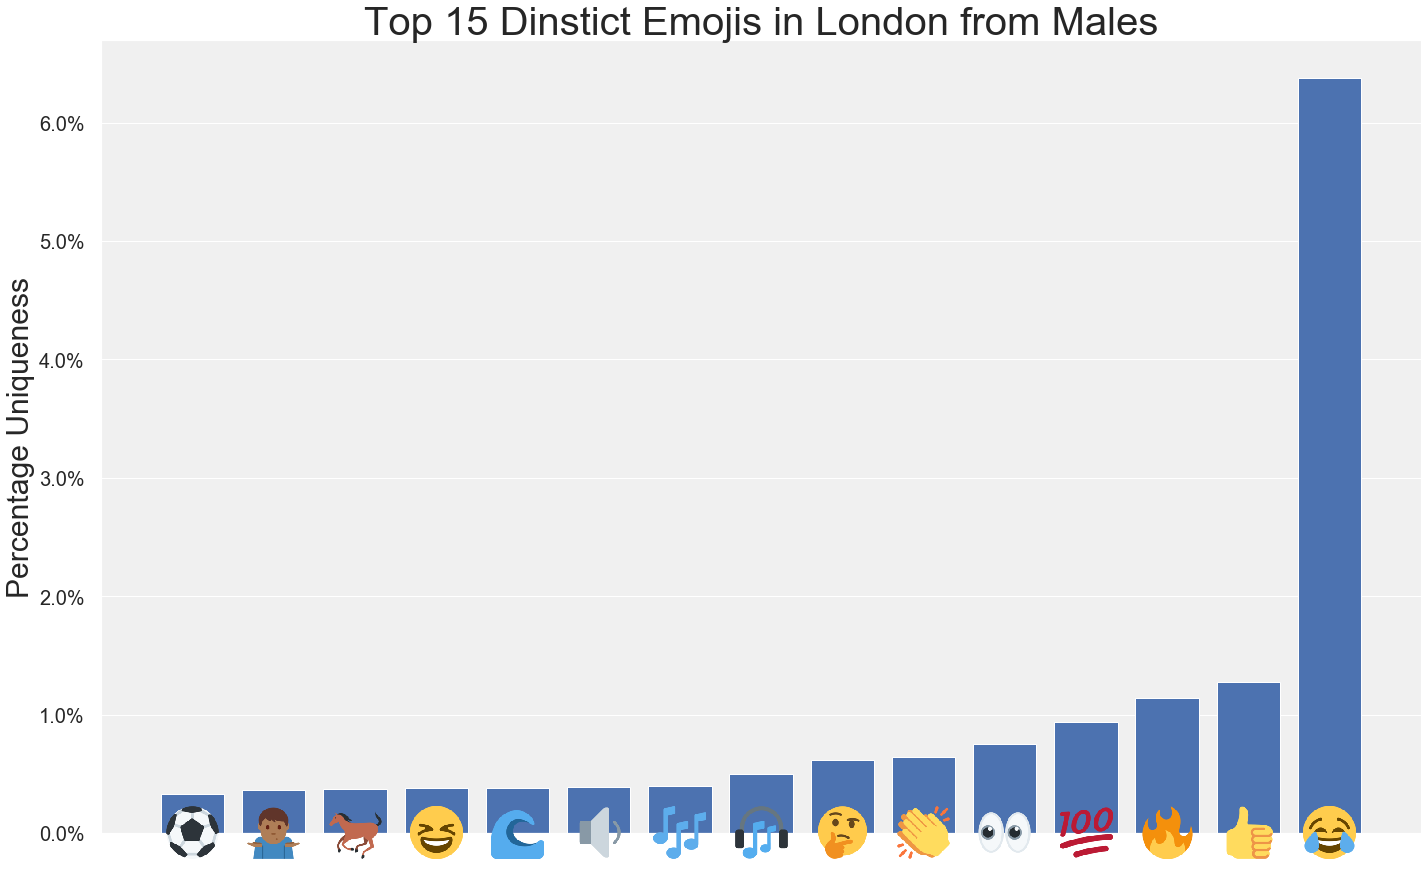

In [14]:
gender_list = ['Females','Males']
gender_values =[gender_stats_df.fillna(0).sort_values(by=['Females_Perc_Dif']),gender_stats_df.fillna(0).sort_values(by=['Males_Perc_Dif'])]
gender_graph_colours=['ffe9ec','0F0F0F0F']

for ind,gen in enumerate(gender_list):
    
    # Top 15 Values
    x = gender_values[ind]['Emoji'].tail(15).values
    y = gender_values[ind]['{}_Perc_Dif'.format(gender_list[ind])].tail(15).values
    
    # Set linespacing
    x_linespace = linspace(0, 4*pi, num=15)

    # Plot Bar Chart
    fig, ax = plt.subplots(figsize=(20,12))
    ax.yaxis.set_major_formatter(formatter_percentage)
    ax.tick_params(axis='both', which='major', pad=10)
    ax.set_facecolor('#{}'.format(gender_graph_colours[ind]))
    plt.grid(linestyle='-', linewidth=1,axis='y')
    plt.bar(x_linespace, y, width=0.7, bottom=None, align='center')
    ax.get_xaxis().set_visible(False)
    #plt.xticks(x, fontproperties=emojis_font)  Old method
    plt.yticks(fontsize =20)
    plt.ylabel('Percentage Uniqueness', fontsize =30)
    plt.title('Top 15 Dinstict Emojis in London from {}'.format(gender_list[ind]), fontsize =40)
    plt.tight_layout()

    # Plot emojis on x-axis
    bar_chart_plot_emojis(ax,fig,x)

    plt.show()

## Extract, Count & Sort Emojis for White Ethnicity

In [15]:
# Count emojis (Ethnicity Confidence: 0.75)
count_white = extract.count_all_emoji(lon_join_df.loc[(lon_join_df['ethnicity'] == 'white')& (lon_join_df['ethnicity:confidence'].astype(float)>0.75)]['text'])
count_not_white =extract.count_all_emoji(lon_join_df.loc[(lon_join_df['ethnicity'] != 'white')& (lon_join_df['ethnicity:confidence'].astype(float)>0.75)]['text'])

# Create panda dataframe to store emojis with counts

# Whites
emojis_count_white_df = pd.DataFrame(columns = ['Emoji','Whites_Count'])
for emoji in count_white:
    emojis_count_white_df = emojis_count_white_df.append({'Emoji' : emoji , 'Whites_Count' : count_white[emoji]} , ignore_index=True)

# Not Whites
emojis_count_not_white_df = pd.DataFrame(columns = ['Emoji','Not_Whites_Count'])
for emoji in count_not_white:
    emojis_count_not_white_df = emojis_count_not_white_df.append({'Emoji' : emoji , 'Not_Whites_Count' : count_not_white[emoji]} , ignore_index=True)    

# White Stats
white_stats_df = emojis_count_white_df.join(emojis_count_not_white_df.set_index('Emoji'), on='Emoji')

# Calculate percentage usage for each emoji per ethnicity
white_count_perc = white_stats_df['Whites_Count'] /white_stats_df['Whites_Count'].sum()
white_stats_df['Whites_Count_Perc']=white_count_perc
not_white_count_perc = white_stats_df['Not_Whites_Count'] /white_stats_df['Not_Whites_Count'].sum()
white_stats_df['Not_Whites_Count_Perc']=not_white_count_perc
white_perc_dif = white_stats_df['Whites_Count_Perc'] - white_stats_df['Not_Whites_Count_Perc']
white_stats_df['Whites_Perc_Dif']=white_perc_dif
not_white_perc_dif = white_stats_df['Not_Whites_Count_Perc'] - white_stats_df['Whites_Count_Perc']
white_stats_df['Not_Whites_Perc_Dif']=not_white_perc_dif

white_stats_df = white_stats_df.fillna(0).sort_values(by=['Whites_Perc_Dif'])
white_stats_df.tail(20)

,Emoji,Whites_Count,Not_Whites_Count,Whites_Count_Perc,Not_Whites_Count_Perc,Whites_Perc_Dif,Not_Whites_Perc_Dif
31,😱,1627,341,0.006409,0.002158,0.004250,-0.004250
51,😎,1810,450,0.007130,0.002848,0.004281,-0.004281
71,😁,2535,855,0.009985,0.005412,0.004574,-0.004574
85,😘,3509,1417,0.013822,0.008969,0.004853,-0.004853
114,💪,1409,85,0.005550,0.000538,0.005012,-0.005012
155,😀,1673,224,0.006590,0.001418,0.005172,-0.005172
22,🙌🏻,1398,48,0.005507,0.000304,0.005203,-0.005203
977,📲,1349,7,0.005314,0.000044,0.005269,-0.005269
11,👍🏻,1417,8,0.005582,0.000051,0.005531,-0.005531
10,❤,13390,7397,0.052744,0.046821,0.005923,-0.005923


## Extract, Count & Sort Emojis for Black Ethnicity

In [16]:
# Count emojis (Ethnicity Confidence: 0.75)
count_black = extract.count_all_emoji(lon_join_df.loc[(lon_join_df['ethnicity'] == 'black')& (lon_join_df['ethnicity:confidence'].astype(float)>0.75)]['text'])
count_not_black  =extract.count_all_emoji(lon_join_df.loc[(lon_join_df['ethnicity'] != 'black')& (lon_join_df['ethnicity:confidence'].astype(float)>0.75)]['text'])

# Create panda dataframe to store emojis with counts

# Blacks 
emojis_count_black_df = pd.DataFrame(columns = ['Emoji','Blacks_Count'])
for emoji in count_black:
    emojis_count_black_df = emojis_count_black_df.append({'Emoji' : emoji , 'Blacks_Count' : count_black[emoji]} , ignore_index=True)

# Not Blacks
emojis_count_not_black_df = pd.DataFrame(columns = ['Emoji','Not_Blacks_Count'])
for emoji in count_not_black:
    emojis_count_not_black_df = emojis_count_not_black_df.append({'Emoji' : emoji , 'Not_Blacks_Count' : count_not_black[emoji]} , ignore_index=True)    

# Black Stats
black_stats_df = emojis_count_black_df.join(emojis_count_not_black_df.set_index('Emoji'), on='Emoji')

# Calculate percentage usage for each emoji per ethnicity
black_count_perc = black_stats_df['Blacks_Count'] /black_stats_df['Blacks_Count'].sum()
black_stats_df['Blacks_Count_Perc']=black_count_perc
not_black_count_perc = black_stats_df['Not_Blacks_Count'] /black_stats_df['Not_Blacks_Count'].sum()
black_stats_df['Not_Blacks_Count_Perc']=not_black_count_perc
black_perc_dif = black_stats_df['Blacks_Count_Perc'] - black_stats_df['Not_Blacks_Count_Perc']
black_stats_df['Blacks_Perc_Dif']=black_perc_dif
not_black_perc_dif = black_stats_df['Not_Blacks_Count_Perc'] - black_stats_df['Blacks_Count_Perc']
black_stats_df['Not_Blacks_Perc_Dif']=not_black_perc_dif

black_stats_df = black_stats_df.fillna(0).sort_values(by=['Blacks_Perc_Dif'])
black_stats_df.tail(20)

,Emoji,Blacks_Count,Not_Blacks_Count,Blacks_Count_Perc,Not_Blacks_Count_Perc,Blacks_Perc_Dif,Not_Blacks_Perc_Dif
188,🤦🏾‍♂️,492,3,0.003219,0.000012,0.003207,-0.003207
11,😅,1473,1552,0.009639,0.006259,0.003380,-0.003380
178,👊🏾,519,3,0.003396,0.000012,0.003384,-0.003384
38,💀,757,372,0.004953,0.001500,0.003453,-0.003453
163,💪🏾,556,13,0.003638,0.000052,0.003586,-0.003586
58,👌🏾,574,8,0.003756,0.000032,0.003724,-0.003724
4,👀,1860,2046,0.012171,0.008251,0.003920,-0.003920
165,🌊,788,217,0.005156,0.000875,0.004281,-0.004281
274,🔉,665,1,0.004351,0.000004,0.004347,-0.004347
35,🤷🏾‍♂️,667,3,0.004364,0.000012,0.004352,-0.004352


## Extract, Count & Sort Emojis for Other and Hispanic Ethnicity

In [17]:
# Count emojis (Ethnicity Confidence: 0.75)
count_other = extract.count_all_emoji(lon_join_df.loc[((lon_join_df['ethnicity'] == 'hispanic')|(lon_join_df['ethnicity'] == 'other'))& (lon_join_df['ethnicity:confidence'].astype(float)>0.75)]['text'])
count_not_other  =extract.count_all_emoji(lon_join_df.loc[(lon_join_df['ethnicity'] != 'hispanic')&(lon_join_df['ethnicity'] != 'other')& (lon_join_df['ethnicity:confidence'].astype(float)>0.75)]['text'])

# Create panda dataframe to store emojis with counts

# Others 
emojis_count_other_df = pd.DataFrame(columns = ['Emoji','Others_Count'])
for emoji in count_other:
    emojis_count_other_df = emojis_count_other_df.append({'Emoji' : emoji , 'Others_Count' : count_other[emoji]} , ignore_index=True)

# Not Others
emojis_count_not_other_df = pd.DataFrame(columns = ['Emoji','Not_Others_Count'])
for emoji in count_not_other:
    emojis_count_not_other_df = emojis_count_not_other_df.append({'Emoji' : emoji , 'Not_Others_Count' : count_not_other[emoji]} , ignore_index=True)    

# Others Stats
other_stats_df = emojis_count_other_df.join(emojis_count_not_other_df.set_index('Emoji'), on='Emoji')

# Calculate percentage usage for each emoji per ethnicity
other_count_perc = other_stats_df['Others_Count'] /other_stats_df['Others_Count'].sum()
other_stats_df['Others_Count_Perc']=other_count_perc
not_other_count_perc = other_stats_df['Not_Others_Count'] /other_stats_df['Not_Others_Count'].sum()
other_stats_df['Not_Others_Count_Perc']=not_other_count_perc
other_perc_dif = other_stats_df['Others_Count_Perc'] - other_stats_df['Not_Others_Count_Perc']
other_stats_df['Others_Perc_Dif']=other_perc_dif
not_other_perc_dif = other_stats_df['Not_Others_Count_Perc'] - other_stats_df['Others_Count_Perc']
other_stats_df['Not_Others_Perc_Dif']=not_black_perc_dif

other_stats_df = other_stats_df.fillna(0).sort_values(by=['Others_Perc_Dif'])
other_stats_df.tail(20)

,Emoji,Others_Count,Not_Others_Count,Others_Count_Perc,Not_Others_Count_Perc,Others_Perc_Dif,Not_Others_Perc_Dif
149,🚮,8,208,0.004863,0.000647,0.004216,0.003218
49,👍🏾,9,256,0.005471,0.000796,0.004675,0.001128
86,🏴󠁧󠁢󠁥󠁮󠁧󠁿,18,1570,0.010942,0.004882,0.006060,-0.001840
11,💙,23,2534,0.013982,0.007880,0.006101,-0.003380
9,✋🏻,11,34,0.006687,0.000106,0.006581,0.004806
194,🤷🏻‍♀️,14,485,0.008511,0.001508,0.007002,-0.000883
77,🎉,33,4021,0.020061,0.012505,0.007556,-0.002793
45,🙌🏾,28,2763,0.017021,0.008592,0.008429,-0.000122
198,🇮🇳,14,11,0.008511,0.000034,0.008476,0.000621
172,🙈,24,1877,0.014590,0.005837,0.008753,0.000122


## Extract, Count & Sort Emojis for Asian Ethnicity

In [18]:
# Count emojis (Ethnicity Confidence: 0.75)
count_asian = extract.count_all_emoji(lon_join_df.loc[(lon_join_df['ethnicity'] == 'asian')& (lon_join_df['ethnicity:confidence'].astype(float)>0.75)]['text'])
count_not_asian  =extract.count_all_emoji(lon_join_df.loc[(lon_join_df['ethnicity'] != 'asian')&(lon_join_df['ethnicity:confidence'].astype(float)>0.75)]['text'])

# Create panda dataframe to store emojis with counts

# Asians 
emojis_count_asian_df = pd.DataFrame(columns = ['Emoji','Asians_Count'])
for emoji in count_asian:
    emojis_count_asian_df = emojis_count_asian_df.append({'Emoji' : emoji , 'Asians_Count' : count_asian[emoji]} , ignore_index=True)

# Not Asians
emojis_count_not_asian_df = pd.DataFrame(columns = ['Emoji','Not_Asians_Count'])
for emoji in count_not_asian:
    emojis_count_not_asian_df = emojis_count_not_asian_df.append({'Emoji' : emoji , 'Not_Asians_Count' : count_not_asian[emoji]} , ignore_index=True)    

# Asians Stats
asian_stats_df = emojis_count_asian_df.join(emojis_count_not_asian_df.set_index('Emoji'), on='Emoji')

# Calculate percentage usage for each emoji per gender
asian_count_perc = asian_stats_df['Asians_Count'] /asian_stats_df['Asians_Count'].sum()
asian_stats_df['Asians_Count_Perc']=asian_count_perc
not_asian_count_perc = asian_stats_df['Not_Asians_Count'] /asian_stats_df['Not_Asians_Count'].sum()
asian_stats_df['Not_Asians_Count_Perc']=not_asian_count_perc
asian_perc_dif = asian_stats_df['Asians_Count_Perc'] - asian_stats_df['Not_Asians_Count_Perc']
asian_stats_df['Asians_Perc_Dif']=asian_perc_dif
not_asian_perc_dif = asian_stats_df['Not_Asians_Count_Perc'] - asian_stats_df['Asians_Count_Perc']
asian_stats_df['Not_Asians_Perc_Dif']=not_black_perc_dif

asian_stats_df = asian_stats_df.fillna(0).sort_values(by=['Asians_Perc_Dif'])
asian_stats_df.tail(20)

,Emoji,Asians_Count,Not_Asians_Count,Asians_Count_Perc,Not_Asians_Count_Perc,Asians_Perc_Dif,Not_Asians_Perc_Dif
65,💝,23,110,0.004468,0.000313,0.004155,-0.000136
125,😪,32,674,0.006216,0.001918,0.004298,0.000002
101,🌚,29,311,0.005633,0.000885,0.004748,0.000175
21,🤘🏼,26,63,0.005051,0.000179,0.004871,-0.001704
12,💕,93,4267,0.018065,0.012140,0.005925,-0.000430
68,💘,35,210,0.006799,0.000597,0.006201,-0.000417
189,💸,36,266,0.006993,0.000757,0.006236,-0.000548
123,🙆‍♀️,33,4,0.006410,0.000011,0.006399,0.000027
4,🤙🏻,37,65,0.007187,0.000185,0.007002,-0.003920
327,🖕🏻,41,62,0.007964,0.000176,0.007788,0.000183


## Top 15 Emojis Graph by Ethnicity

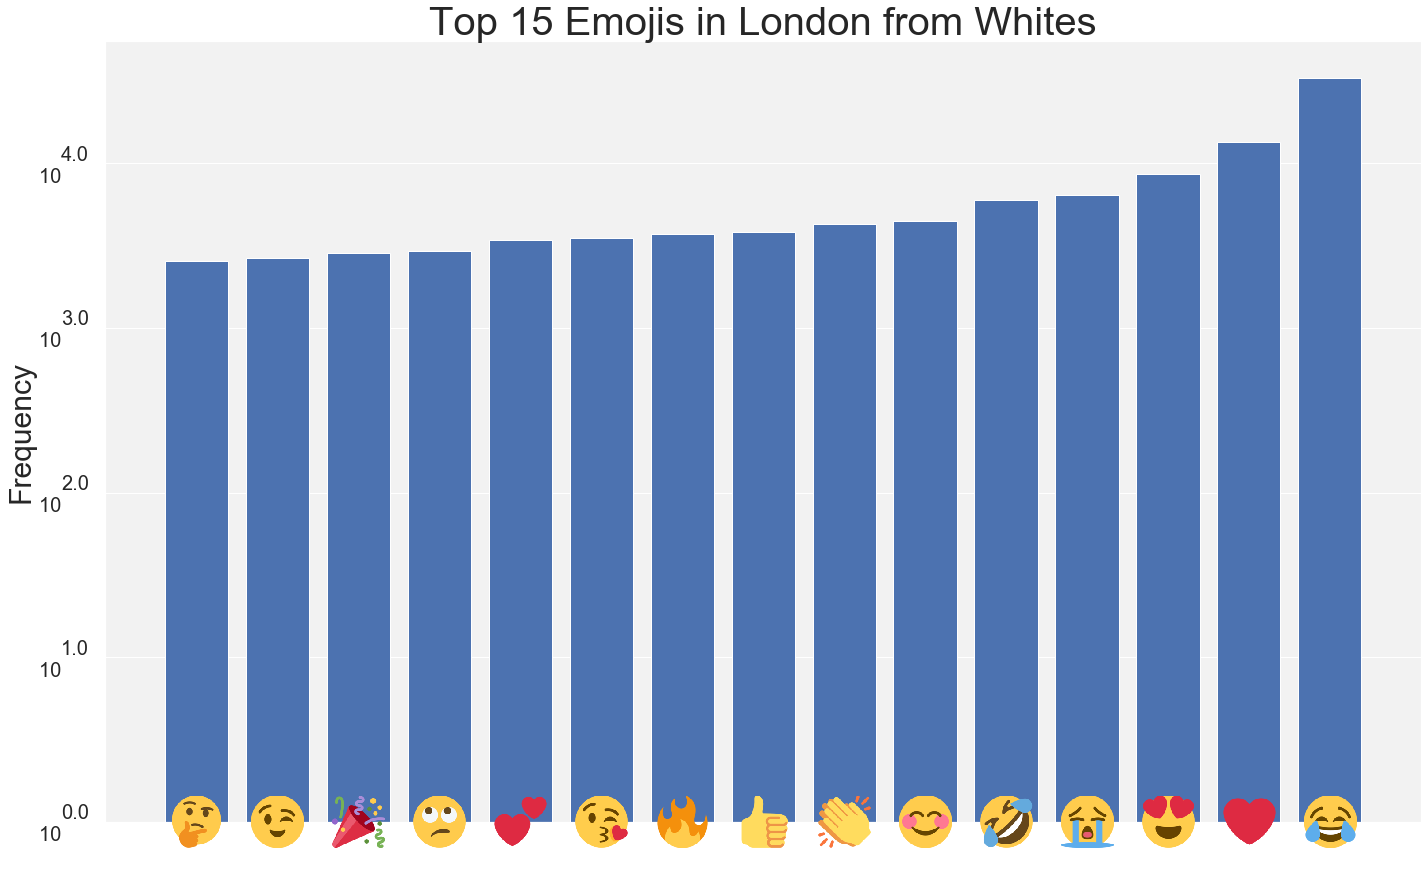

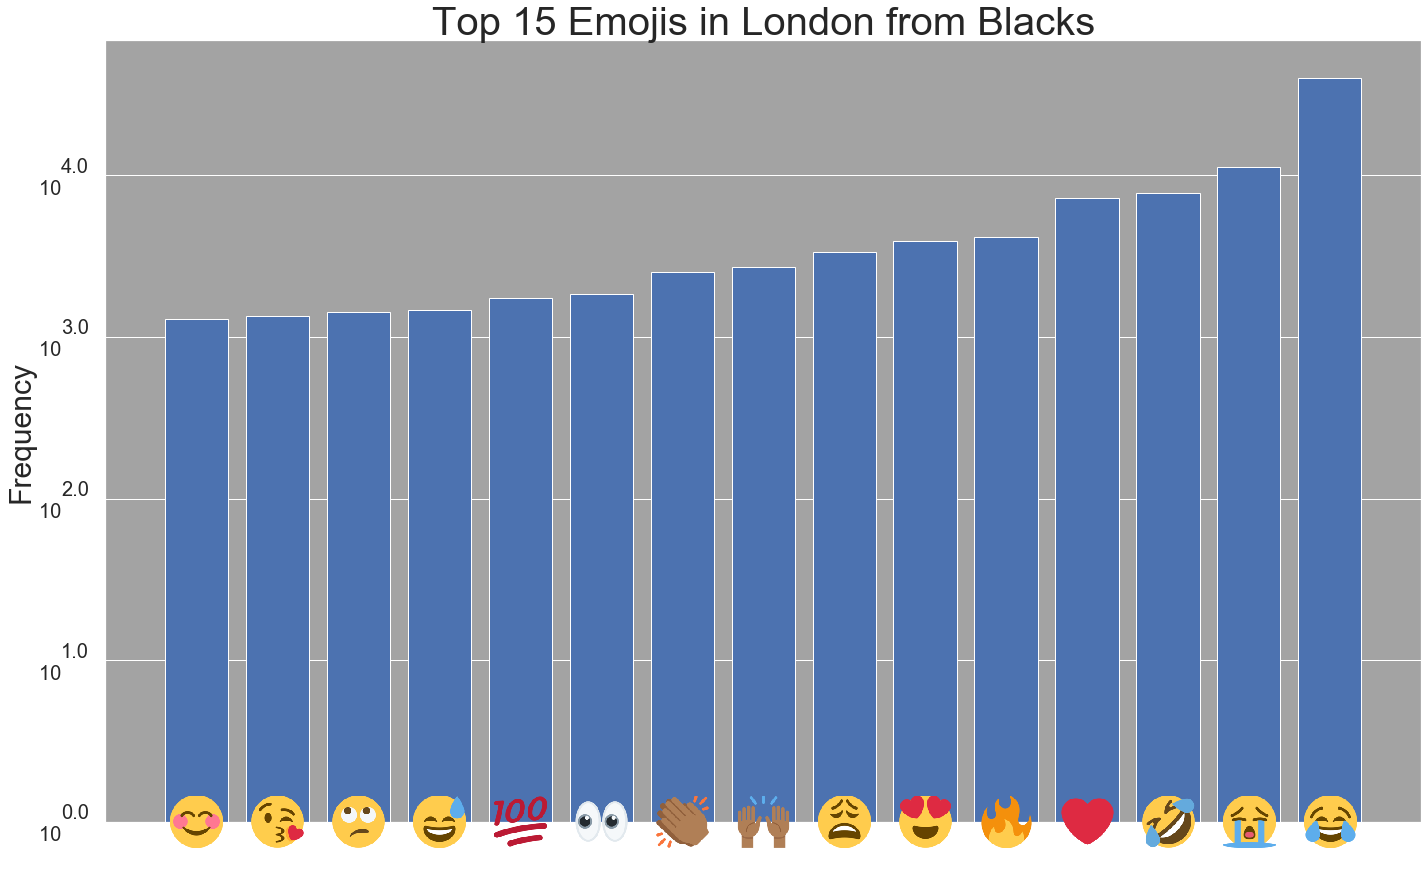

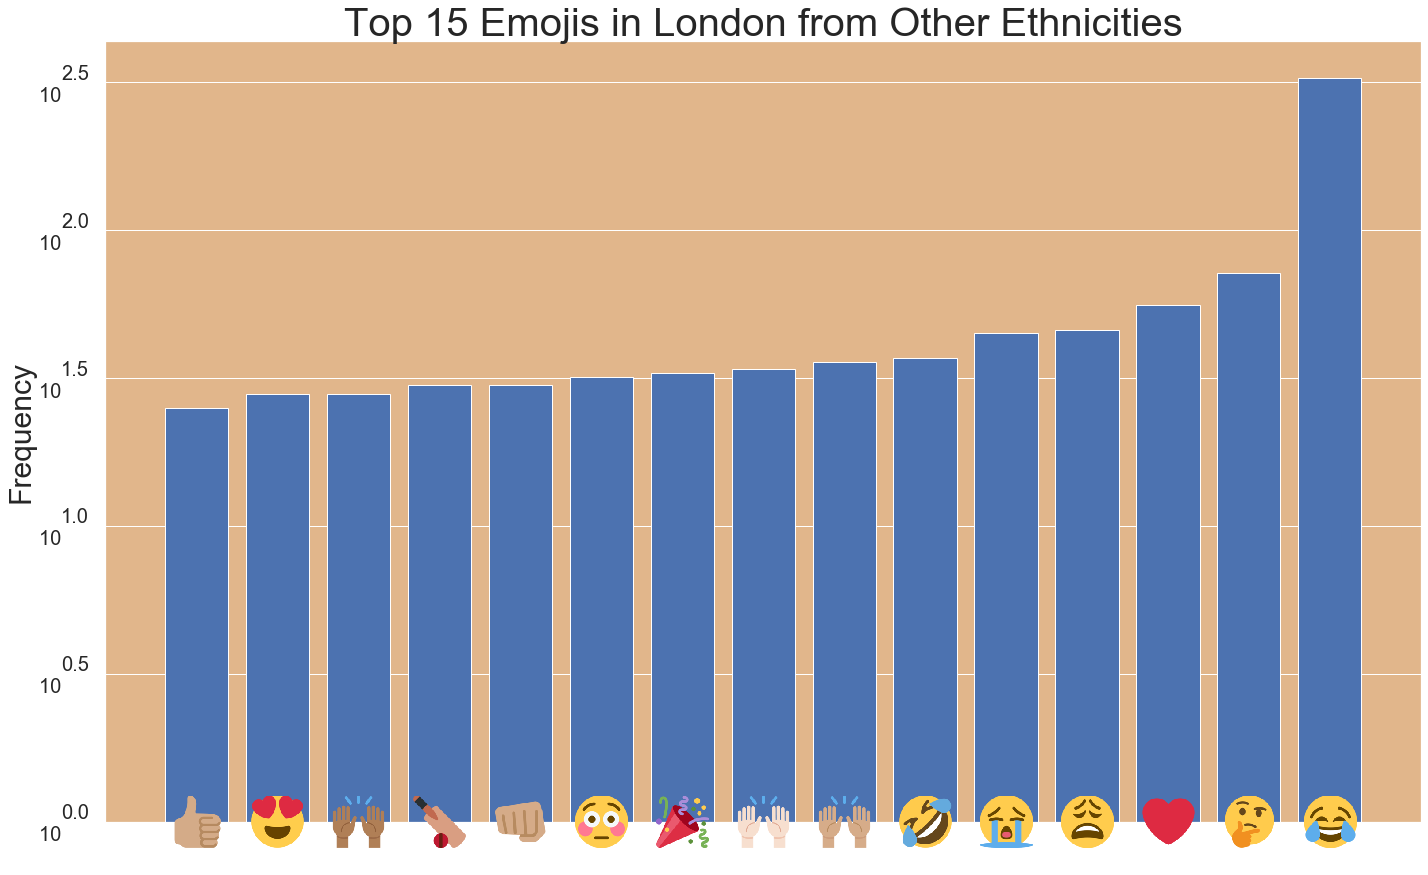

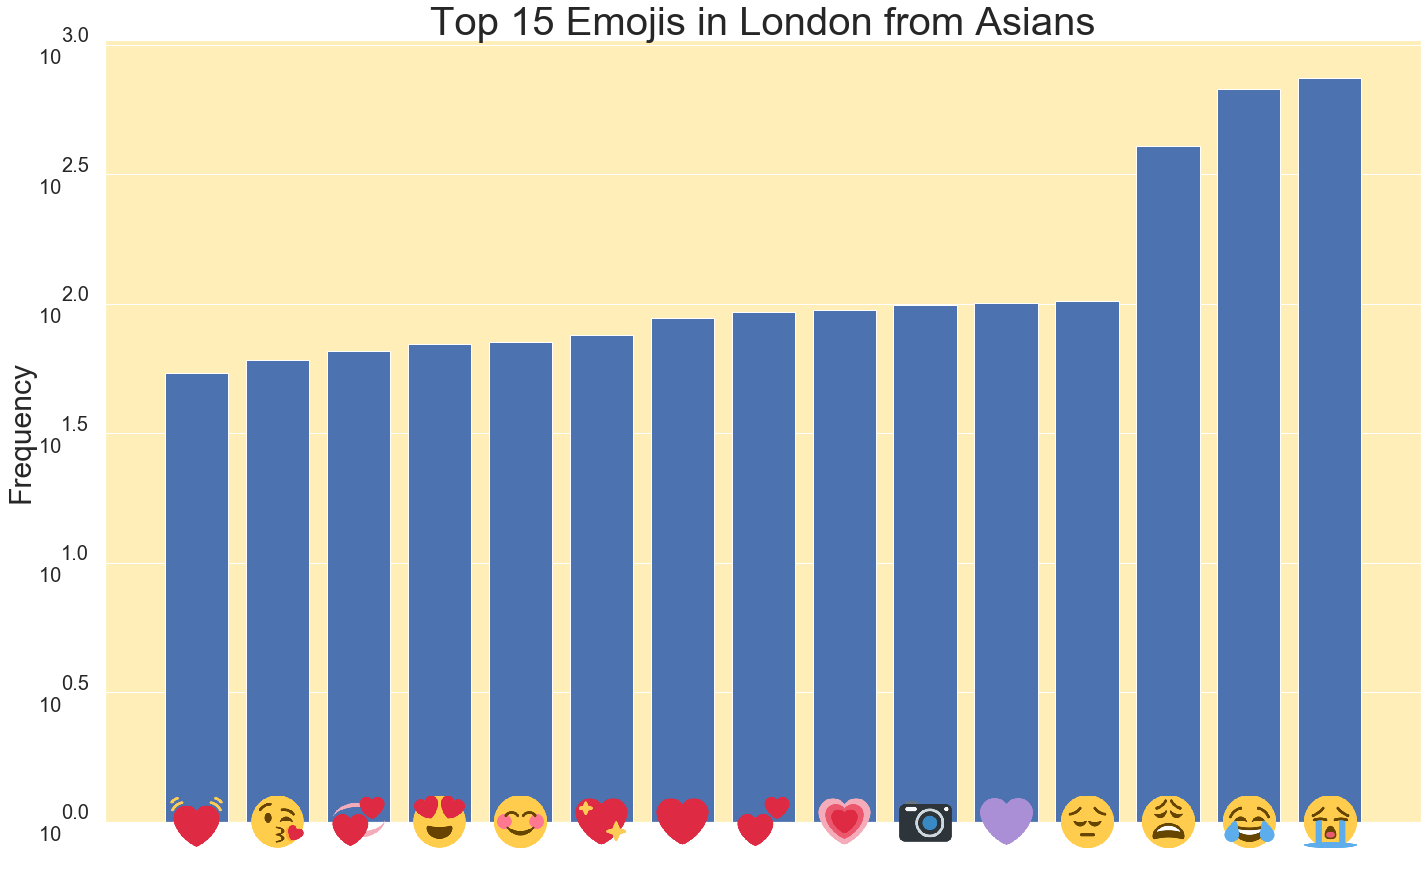

In [19]:
ethnicities_list = ['Whites','Blacks','Others','Asians']
ethnicities_values =[white_stats_df.sort_values(by=['Whites_Count']),black_stats_df.sort_values(by=['Blacks_Count']),other_stats_df.sort_values(by=['Others_Count']),asian_stats_df.sort_values(by=['Asians_Count'])]
ethnicities_graph_colours=['f2f2f2','a3a3a3','e1b68b','ffeeb7']

for ind,ethn in enumerate(ethnicities_list):

     # Top 15 Values
    x = ethnicities_values[ind]['Emoji'].tail(15).values
    y = ethnicities_values[ind]['{}_Count'.format(ethnicities_list[ind])].tail(15).values
    y_log = np.log10(y.astype(int))

    # Set linespacing
    x_linespace = linspace(0, 4*pi, num=15)

    # Plot Bar Chart
    fig, ax = plt.subplots(figsize=(20,12))
    ax.yaxis.set_major_formatter(formatter_pow10_1dp)
    ax.tick_params(axis='both', which='major', pad=10)
    ax.set_facecolor('#{}'.format(ethnicities_graph_colours[ind]))
    plt.grid(linestyle='-', linewidth=1,axis='y')
    plt.bar(x_linespace, y_log, width=0.7, bottom=None, align='center')
    ax.get_xaxis().set_visible(False)
    plt.yticks(fontsize =20)
    plt.ylabel('Frequency', fontsize =30)
    plt.title('Top 15 Emojis in London from {}'.format(ethnicities_list[ind]), fontsize =40)
    if(ethnicities_list[ind] == 'Others'):
        plt.title('Top 15 Emojis in London from Other Ethnicities', fontsize =40)
    plt.tight_layout()

    # Plot emojis on x-axis
    bar_chart_plot_emojis(ax,fig,x)
    plt.show()

## Top 15 Dinstict Emojis Graph by Ethnicity

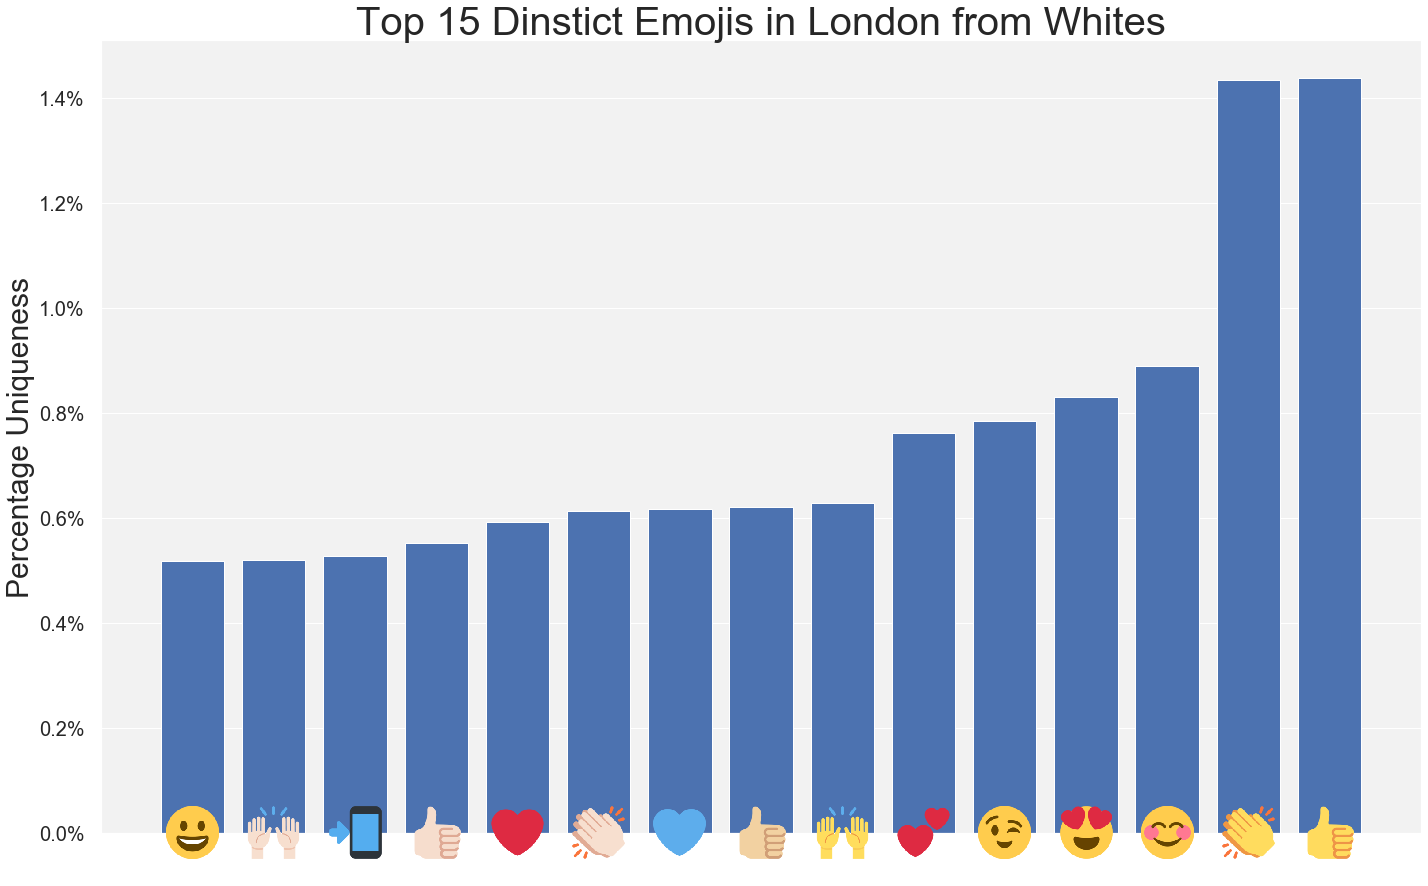

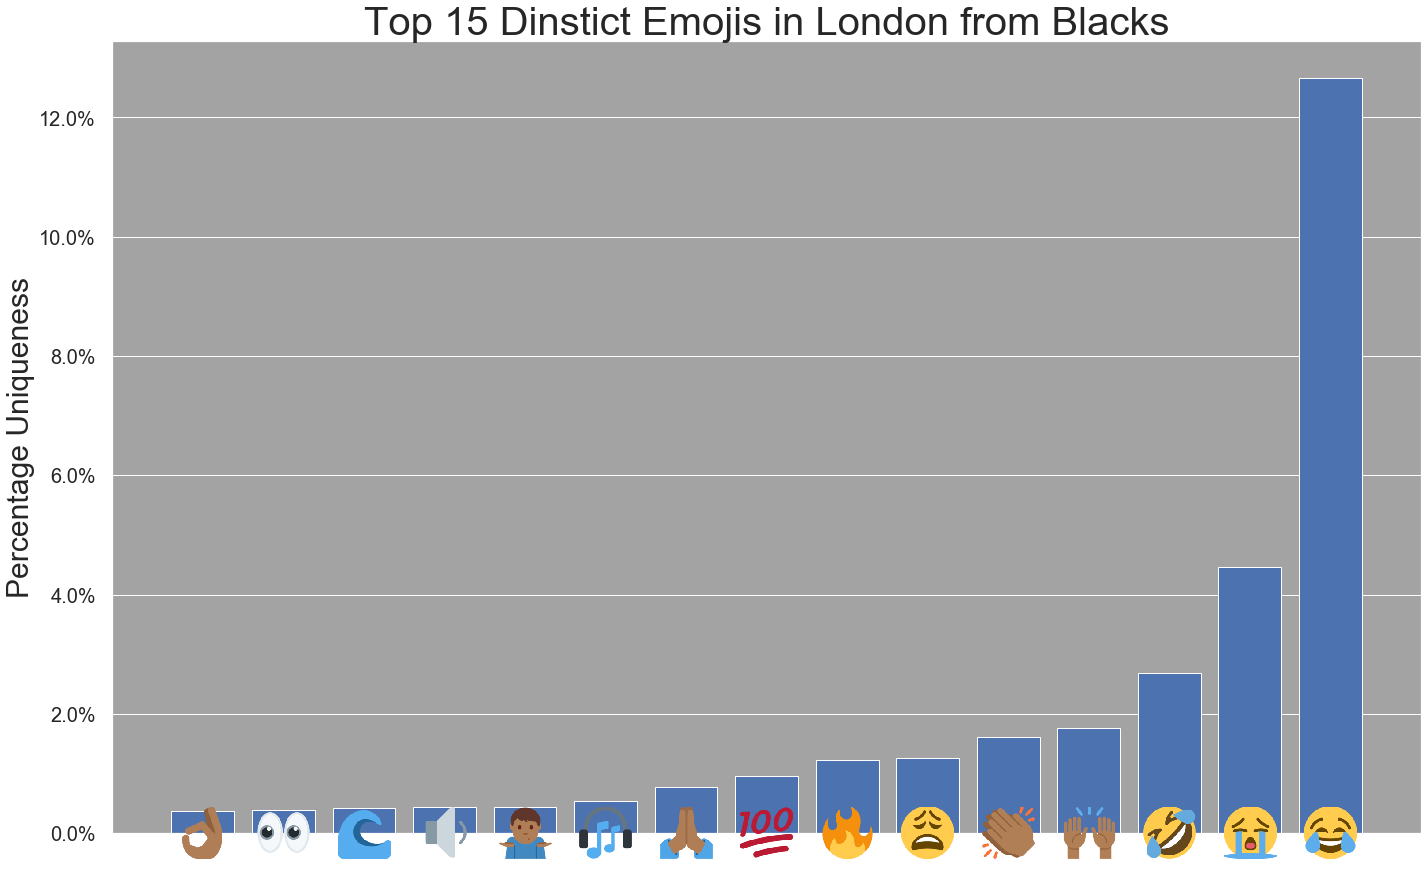

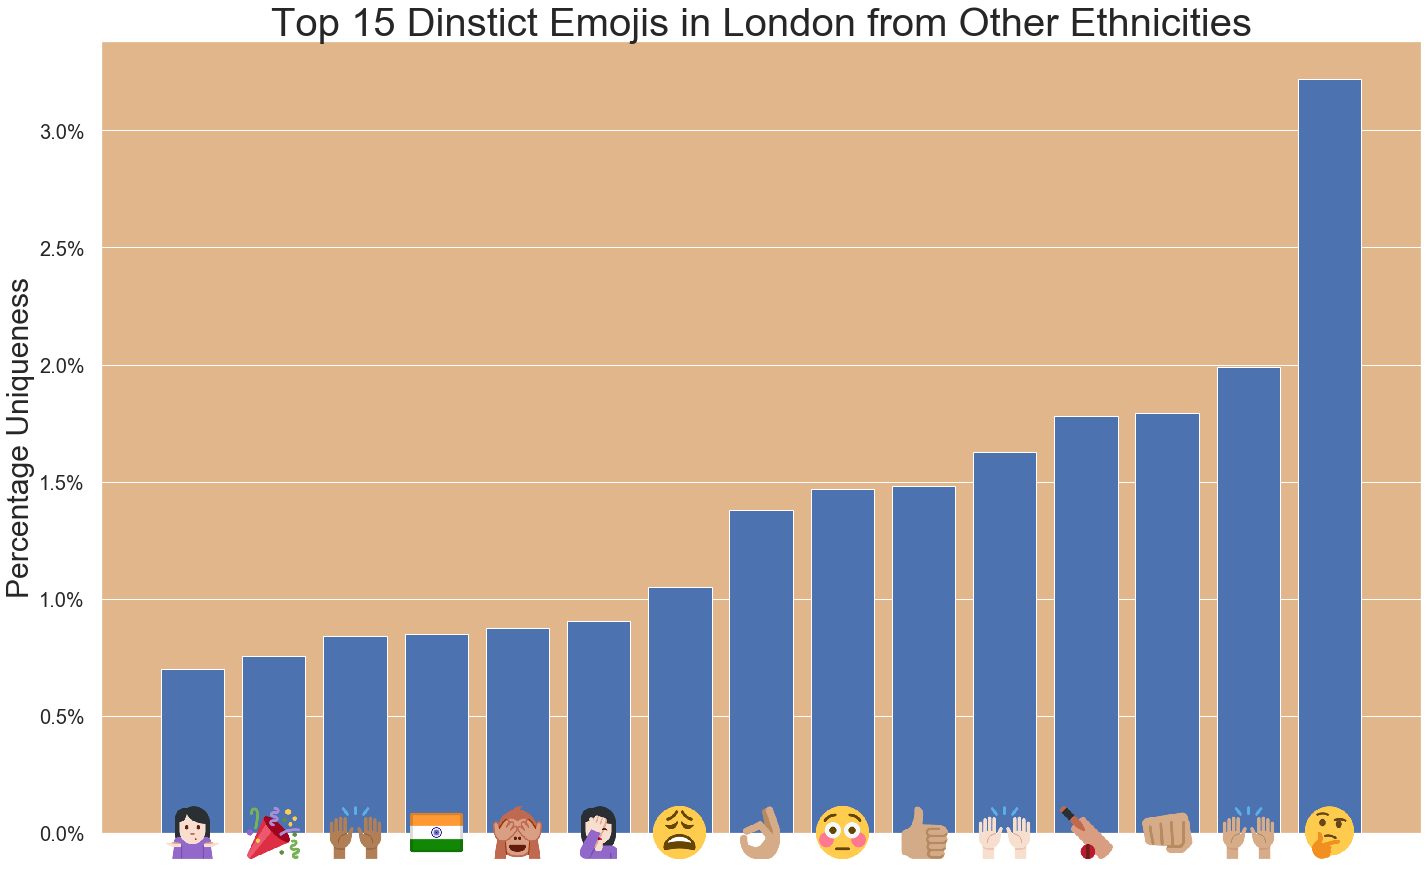

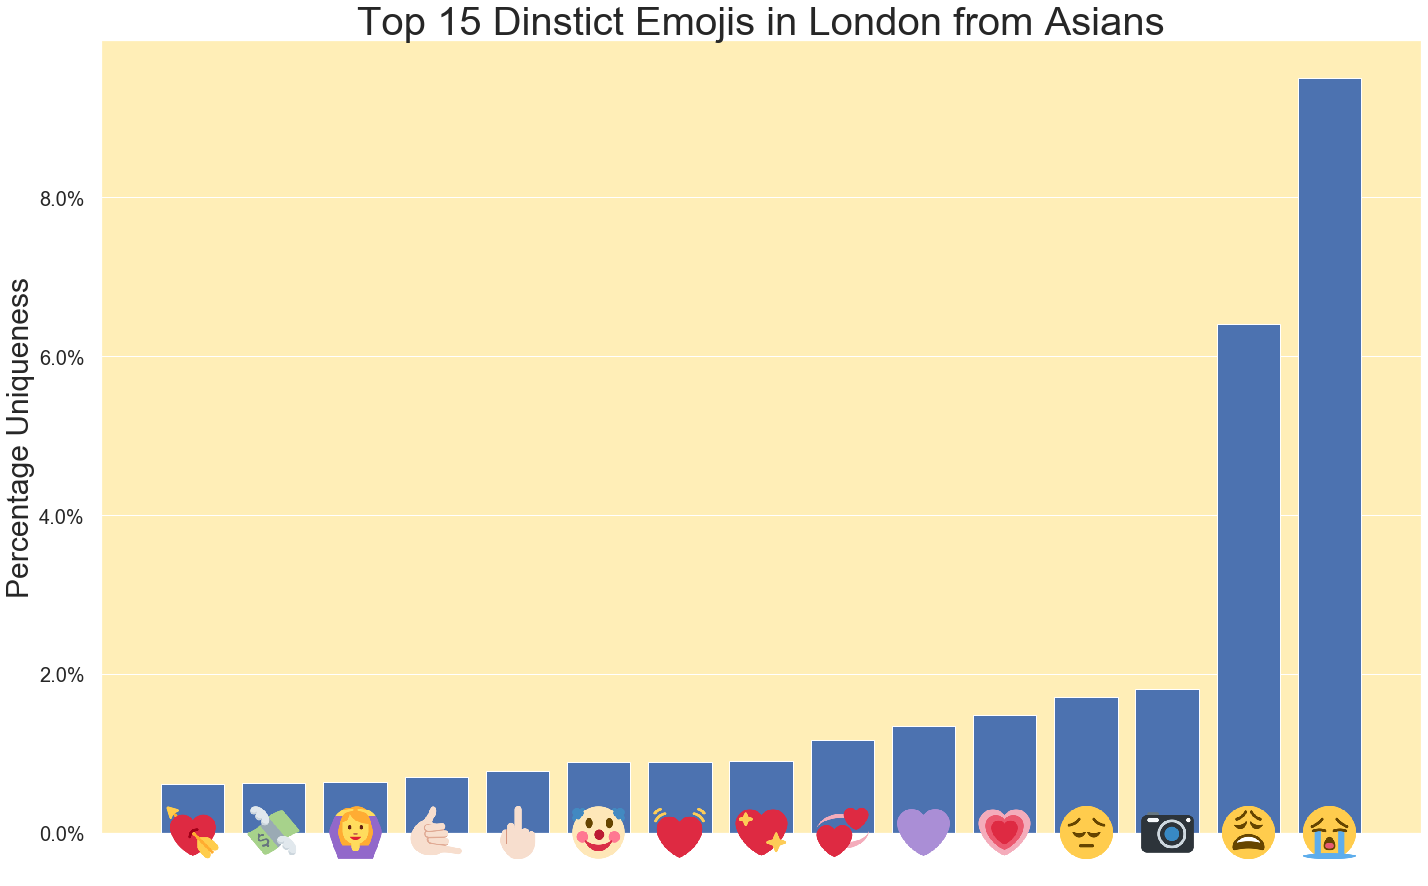

In [20]:
ethnicities_list = ['Whites','Blacks','Others','Asians']
ethnicities_values =[white_stats_df.sort_values(by=['Whites_Perc_Dif']),black_stats_df.sort_values(by=['Blacks_Perc_Dif']),other_stats_df.sort_values(by=['Others_Perc_Dif']),asian_stats_df.sort_values(by=['Asians_Perc_Dif'])]
ethnicities_graph_colours=['f2f2f2','a3a3a3','e1b68b','ffeeb7']

for ind,ethn in enumerate(ethnicities_list):

     # Top 15 Values
    x = ethnicities_values[ind]['Emoji'].tail(15).values
    y = ethnicities_values[ind]['{}_Perc_Dif'.format(ethnicities_list[ind])].tail(15).values

    # Set linespacing
    x_linespace = linspace(0, 4*pi, num=15)

    # Plot Bar Chart
    fig, ax = plt.subplots(figsize=(20,12))
    ax.yaxis.set_major_formatter(formatter_percentage)
    ax.tick_params(axis='both', which='major', pad=10)
    ax.set_facecolor('#{}'.format(ethnicities_graph_colours[ind]))
    plt.grid(linestyle='-', linewidth=1,axis='y')
    plt.bar(x_linespace, y, width=0.7, bottom=None, align='center')
    ax.get_xaxis().set_visible(False)
    plt.yticks(fontsize =20)
    plt.ylabel('Percentage Uniqueness', fontsize =30)
    plt.title('Top 15 Dinstict Emojis in London from {}'.format(ethnicities_list[ind]), fontsize =40)
    if(ethnicities_list[ind] == 'Others'):
        plt.title('Top 15 Dinstict Emojis in London from Other Ethnicities', fontsize =40)
    plt.tight_layout()

    # Plot emojis on x-axis
    bar_chart_plot_emojis(ax,fig,x)
    plt.show()

## Top 15 Emojis in London Pie Chart

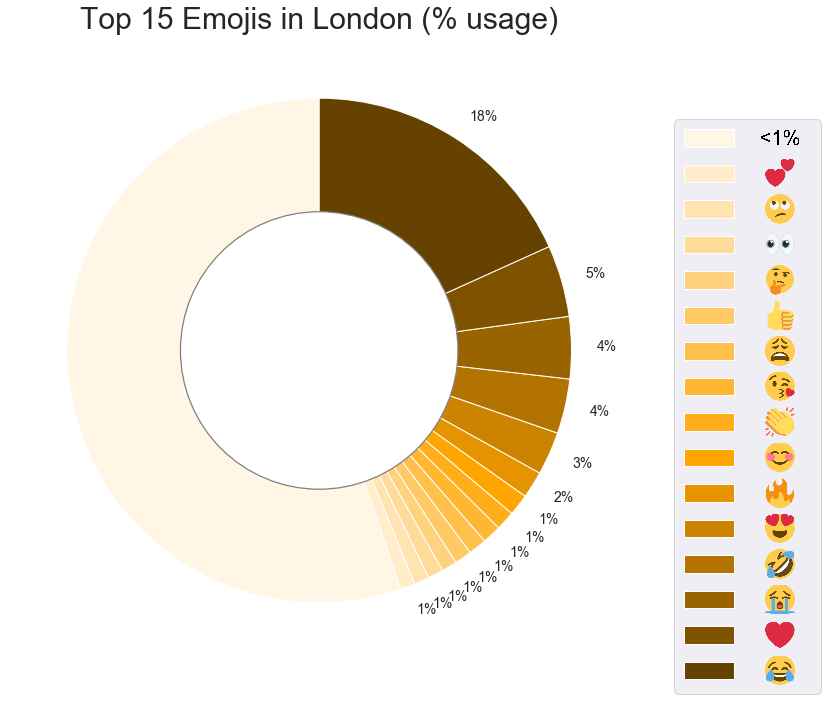

In [73]:
x = emojis_count_df['Emoji'].tail(15).values
y = (emojis_count_df['Count']/emojis_count_df['Count'].sum()).tail(15).values
fill = 1 -y.sum()
new_y = np.append([fill],y)

y_labels = []
for i,perc in enumerate (y):
    y_labels.append("{:.0f}%".format(perc*100))
# Don't show other <1%
y_labels.insert(0,"")

colors = ["#fff6e5","#ffedcc","#ffe4b2","#ffdb99","#ffd27f","#ffc966","#ffc04c","#ffb732","#ffae19","#ffa500","#e59400","#cc8400","#b27300",
"#996300","#7f5200","#664200"]
fig, ax = plt.subplots(figsize=(17,12))
title = plt.title('Top 15 Emojis in London (% usage)', fontsize =30)
title.set_ha("center")
plt.gca().axis("equal")
pie = plt.pie(new_y,labels=y_labels,colors=colors, startangle=90, textprops={'fontsize': 14})
legend = plt.legend(pie[0],np.append(['other'],x), bbox_to_anchor=(0.67,0.45), loc="center right", fontsize=25, 
           bbox_transform=plt.gcf().transFigure)
plt.setp(legend.get_texts(), color='#ededf3')
plt.subplots_adjust(left=0.0, bottom=0.15, right=0.5)

centre_circle = plt.Circle((0,0),0.55,color='grey', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Set sizes of figure and images
ax_width = ax.get_window_extent().width
fig_width = fig.get_window_extent().width
fig_height = fig.get_window_extent().height
img_size = ax_width/(fig_width*len(x_linespace))
img_axs = [None for i in range(len(x_linespace))]

y_manual = 0.843
loc = ax.transData.transform((1.88, y_manual))
img_axs[0] = fig.add_axes([loc[0]/fig_width-img_size/2, loc[1]/fig_height-img_size/2, img_size, img_size], anchor='C')
img_axs[0].imshow(io.imread("/home/stelios/Desktop/Honours Project/Emojis-usage-in-social-media-by-demographics/Jupyter/Fonts&Pics/other_less.png"))
img_axs[0].axis("off")
y_manual =y_manual-0.1408

# Display emojis pngs on x-axis
for i in range(len(x)):
    loc = ax.transData.transform((1.88, y_manual))      # Optimize y manually 
    img_axs[i] = fig.add_axes([loc[0]/fig_width-img_size/2, loc[1]/fig_height-img_size/2, img_size, img_size], anchor='C')
    y_manual =y_manual-0.1408
    # Platform 5 = Twitter
    img_axs[i].imshow(io.imread(Emojipedia.search(x[i]).platforms[5].image_url))
    img_axs[i].axis("off")
plt.show()